<a href="https://colab.research.google.com/github/albope/master-data-analytics-content/blob/master/Regresi%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a Regresión Lineal


||continuous|categorical|
|---|---|---|
|**supervised**|**regression**|classification|
|**unsupervised**|dimension reduction|clustering|

## Motivación

Puntos a favor:

- Muy usada.
- Rápida.
- Fácil de usar (solo hiperparámetros de regularización).
- Muy interpretable.
- Primer paso para entender otros modelos.

Puntos en contra:

- Poca capacidad predictiva.
- Low variance.
- No es capaz de captar no linealidad

In [0]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# this allows plots to appear directly in the notebook
%matplotlib inline

## Datos

Primero leamos los datos con los que vamos a trabajar, el dataset iris.

In [0]:
# read data into a DataFrame
from sklearn.datasets import load_iris;
iris = load_iris();
X = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length','petal_width']);
y = iris.target;

150 filas y 4 variables:
    
- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

In [0]:
X.shape

(150, 4)

In [0]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


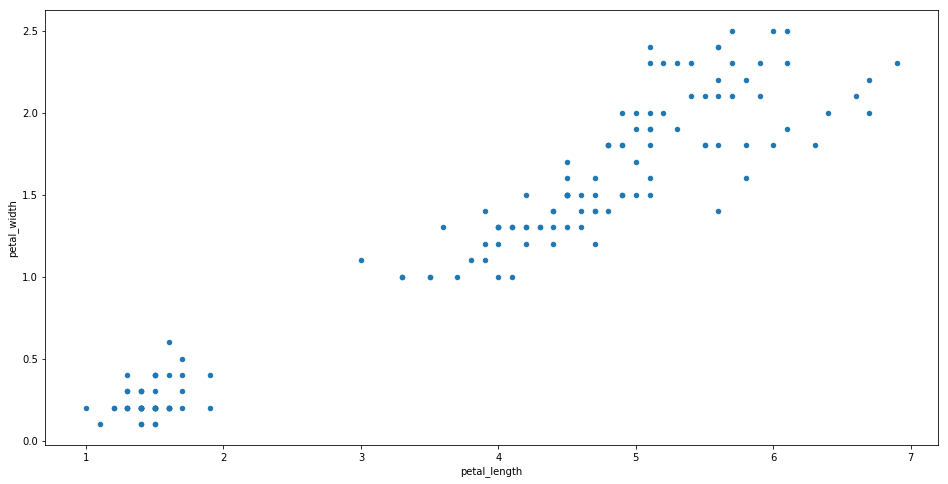

In [0]:
# visualize the relationship between the features and the response using scatterplots
X.plot(kind='scatter', x='petal_length', y='petal_width',  figsize=(16, 8))

## Split Data

Definimos los porcentajes a usar para el split.

In [0]:
perc_values = [0.7, 0.15, 0.15];

Dividimos en train, validación y test.

In [0]:
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=perc_values[1] + perc_values[2], random_state=1);

X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size= perc_values[2] / (perc_values[1] + perc_values[2]), random_state=1)

Comprobamos las dimensiones.

In [0]:
print('Train data size = ' + str(X_train.shape))
print('Train target size = ' + str(y_train.shape))
print('Validation data size = ' + str(X_val.shape))
print('Validation target size = ' + str(y_val.shape))
print('Test data size = ' + str(X_test.shape))
print('Test target size = ' + str(y_test.shape))

Train data size = (105, 4)
Train target size = (105,)
Validation data size = (22, 4)
Validation target size = (22,)
Test data size = (23, 4)
Test target size = (23,)


## Regresión Lineal. 1 Variable

Trata de modelar la relación entre las variables de entrada o patrones y la variable de salida o target mediante la siguiente ecuación:

$\hat{y} = w_0 + w_1x$



![imagen.png](attachment:imagen.png)

En este caso en concreto:

- x = petal_length
- y = petal_width.

$w_0$ y $w_1$ son en este caso los coeficientes del modelo, es decir, los pesos que tenemos que optimizar al entrenar nuestra regresión lineal sobre el conjunto de train.

### Estimación de los pesos, w

Son aquellos que minimizan una métrica, normalmente llamada función de coste.

En la regresión lineal, la función de coste es la distancia al cuadrado entre las predicciones del modelo, 𝑦 ̂, y el valor real del target, 𝑦. Es decir, el MSE.

<img src=figures/08_estimating_coefficients.png>

Nuestros parámetros $w_0$ y $w_1$ serán calculados para minimizar este error cuadrático. 

La intuición geométrica de esots parámetros es la siguiente:

<img src="figures/08_slope_intercept.png">

- $w_0$ es el bias o **intercept** (el valor de $y$ cuando $x=0$)
- $w_1$ es la **pendiente** (el incremento de $y$ por cada incremento en $x$)

### Creación del modelo

1) Importar modelo que se quiere emplear.

In [0]:
from sklearn.linear_model import LinearRegression

2) Importar métrica a emplear.

In [0]:
from sklearn.metrics import mean_absolute_error as metric

3) Definir modelo.

In [0]:
model = LinearRegression()


4) Llamar al método fit para entrenar el modelo.

In [0]:
model.fit(X= X_train[['petal_length']], y = X_train['petal_width'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Veamos los valores de $w_0$ y $w_1$

In [0]:
# print intercept and coefficients
print ('w_0 = ' + str(model.intercept_))
print ('w_1 = ' + str(model.coef_))

w_0 = -0.38662970426260324
w_1 = [0.42190094]


Es decir:

petal_width = -0.38662970426260324 + 0.42190094*petal_length

Por tanto, por cada aumento de una unidad en petal_length aumentamos aproximadamente 0.4 unidades en petal_width (pendiente).

5) Llamar al método predict para generar las predicciones.

In [0]:
pred_train = model.predict(X_train[['petal_length']])
pred_val = model.predict(X_val[['petal_length']])
pred_test = model.predict(X_test[['petal_length']])

In [0]:
print(pred_test[0:5])
print(np.array(X_test['petal_width'][0:5]))

[0.16184152 1.46973443 1.55411462 1.51192453 1.722875  ]
[0.4 1.4 1.4 1.5 1.7]


En el caso de la regresión lineal podemos calcular las predicciones manualmente.

In [0]:
# manually calculate the prediction
pred_test_manual = -0.38662970426260324 + 0.42190094*X_test['petal_length']

Vemos que ambas predicciones son idénticas

In [0]:
print(np.array(pred_test_manual[0:5]))
print(pred_test[0:5])

[0.16184152 1.46973443 1.55411462 1.51192453 1.722875  ]
[0.16184152 1.46973443 1.55411462 1.51192453 1.722875  ]


6) Calcular métrica usando las predicciones obtenidas en el paso anterior.

In [0]:
mae_train = metric(y_train, pred_train)
mae_val = metric(y_val, pred_val)
mae_test = metric(y_test, pred_test)
results = pd.DataFrame()
results = results.append(pd.DataFrame(data={'model':['1 Variable'],'mae_train':[mae_train],'mae_val':[mae_val],'mae_test':[mae_test]}, columns=['model', 'mae_train','mae_val', 'mae_test']), ignore_index=True)

In [0]:
results

,model,mae_train,mae_val,mae_test
0,1 Variable,0.271475,0.289376,0.303618


## Visualizar

Vamos a visualizar la regresión lineal, para ello hacemos una predicción para el mínimo y máximo valor de petal_length.

In [0]:
# make predictions for those x values and store them
lims = model.predict(np.array([X['petal_length'].min(), X['petal_length'].max()]).reshape(-1, 1))
lims

array([0.03527124, 2.52448678])

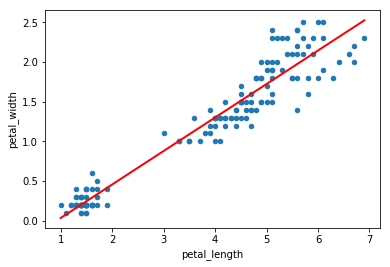

In [0]:
# first, plot the observed data
X.plot(kind='scatter', x='petal_length', y='petal_width')

# then, plot the least squares line
plt.plot(np.array([X['petal_length'].min(), X['petal_length'].max()]).reshape(-1, 1), lims,c='red', linewidth=2)

En esta gráfica se ve claramente porque la regresión lineal es un modelo de low variance. Recibiendo como input puntos muy distintos apenas varía su valor.

## Regresión Lineal. Múltiples Variables

La regresión lineal se extiende fácilmente a usar varias variables predictoras. En ese la fórmula cambia a:

$\hat{y} = w_0 + w_1x_1 + ... + w_nx_n$

En este caso vamos a intentar predecir petal_width en función de las otras variables numéricas, es decir:

$petal width = w_0 + w_1 \times sepal length + w_2 \times sepal width + w_3 \times petal length$


4) Llamar al método fit para entrenar el modelo.

In [0]:
model.fit(X= X_train[['sepal_length', 'sepal_width','petal_length']], y = X_train['petal_width'])

NameError: ignored

Veamos los valores de $w_0$, $w_1$, $w_2$ y $w_3$

In [0]:
# print intercept and coefficients
print ('w_0 = ' + str(model.intercept_))
print ('w_1 = ' + str(model.coef_[0]))
print ('w_2 = ' + str(model.coef_[1]))
print ('w_3 = ' + str(model.coef_[2]))

w_0 = -0.09958520777530211
w_1 = -0.27559295988698085
w_2 = 0.262297654780667
w_3 = 0.5595404013058478


Es decir:

petal_width = -0.09958520777530211 - 0.27559295988698085sepal_length + 0.262297654780667*sepal_width + 0.5595404013058478*petal_length

5) Llamar al método predict para generar las predicciones.

In [0]:
pred_train = model.predict(X_train[['sepal_length', 'sepal_width','petal_length']])
pred_val = model.predict(X_val[['sepal_length', 'sepal_width','petal_length']])
pred_test = model.predict(X_test[['sepal_length', 'sepal_width','petal_length']])

NameError: ignored

In [0]:
print(pred_test[0:5])
print(np.array(X_test['petal_width'][0:5]))

NameError: ignored

En el caso de la regresión lineal podemos calcular las predicciones manualmente.

In [0]:
# manually calculate the prediction
pred_test_manual = -0.09958520777530211 - 0.27559295988698085*X_test['sepal_length'] + 0.262297654780667*X_test['sepal_width'] + 0.5595404013058478*X_test['petal_length']

Vemos que ambas predicciones son idénticas

In [0]:
print(np.array(pred_test_manual[0:5]))
print(pred_test[0:5])

[0.16257618 1.33037199 1.58007655 1.71703758 1.63853693]
[0.16257618 1.33037199 1.58007655 1.71703758 1.63853693]


6) Calcular métrica usando las predicciones obtenidas en el paso anterior.

In [0]:
mae_train = metric(y_train, pred_train)
mae_val = metric(y_val, pred_val)
mae_test = metric(y_test, pred_test)

NameError: ignored

In [0]:
results = results.append(pd.DataFrame(data={'model':['Multivariable'],'mae_train':[mae_train],'mae_val':[mae_val],'mae_test':[mae_test]}, columns=['model', 'mae_train','mae_val', 'mae_test']), ignore_index=True)
results

,model,mae_train,mae_val,mae_test
0,1 Variable,0.271475,0.289376,0.303618
1,Multivariable,0.252824,0.304954,0.287039


## Regularización
![imagen.png](attachment:imagen.png)

### Lasso

![imagen.png](attachment:imagen.png)

1) Importar modelo que se quiere emplear.

In [0]:
from sklearn.linear_model import Lasso

3) Definir modelo.

In [0]:
model = Lasso(alpha = 1)


El parámetro alpha es nuestro $\lambda$.

In [0]:
model.fit(X= X_train[['sepal_length', 'sepal_width','petal_length']], y = X_train['petal_width'])

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

Veamos los valores de $w_0$, $w_1$, $w_2$ y $w_3$

In [0]:
# print intercept and coefficients
print ('w_0 = ' + str(model.intercept_))
print ('w_1 = ' + str(model.coef_[0]))
print ('w_2 = ' + str(model.coef_[1]))
print ('w_3 = ' + str(model.coef_[2]))

w_0 = 0.7930138766444168
w_1 = 0.0
w_2 = -0.0
w_3 = 0.10632749796773562


Es decir:

petal_width = 0.7930138766444168 + 0.10632749796773562*petal_length

Como vemos Lasso ha eliminado las variables sepal_length y sepal_width.

5) Llamar al método predict para generar las predicciones.

In [0]:
pred_train = model.predict(X_train[['sepal_length', 'sepal_width','petal_length']])
pred_val = model.predict(X_val[['sepal_length', 'sepal_width','petal_length']])
pred_test = model.predict(X_test[['sepal_length', 'sepal_width','petal_length']])

6) Calcular métrica usando las predicciones obtenidas en el paso anterior.

In [0]:
mae_train = metric(y_train, pred_train)
mae_val = metric(y_val, pred_val)
mae_test = metric(y_test, pred_test)

In [0]:
results = results.append(pd.DataFrame(data={'model':['Lasso Multivariable'],'mae_train':[mae_train],'mae_val':[mae_val],'mae_test':[mae_test]}, columns=['model', 'mae_train','mae_val', 'mae_test']), ignore_index=True)
results

,model,mae_train,mae_val,mae_test
0,1 Variable,0.271475,0.289376,0.303618
1,Multivariable,0.252824,0.304954,0.287039
2,Lasso Multivariable,0.616812,0.621090,0.527185


### Ridge

![imagen.png](attachment:imagen.png)

1) Importar modelo que se quiere emplear.

In [0]:
from sklearn.linear_model import Ridge

3) Definir modelo.

In [0]:
model = Ridge(alpha = 1)


In [0]:
model.fit(X= X_train[['sepal_length', 'sepal_width','petal_length']], y = X_train['petal_width'])

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

Veamos los valores de $w_0$, $w_1$, $w_2$ y $w_3$

In [0]:
# print intercept and coefficients
print ('w_0 = ' + str(model.intercept_))
print ('w_1 = ' + str(model.coef_[0]))
print ('w_2 = ' + str(model.coef_[1]))
print ('w_3 = ' + str(model.coef_[2]))

w_0 = -0.1639533346598887
w_1 = -0.22541080278709696
w_2 = 0.21993013887459956
w_3 = 0.5333313751226321


Es decir:

petal_width = 0.7930138766444168 + -0.22541080278709696*sepal_length + 0.21993013887459956*sepal_width 0.10632749796773562*petal_length

5) Llamar al método predict para generar las predicciones.

In [0]:
pred_train = model.predict(X_train[['sepal_length', 'sepal_width','petal_length']])
pred_val = model.predict(X_val[['sepal_length', 'sepal_width','petal_length']])
pred_test = model.predict(X_test[['sepal_length', 'sepal_width','petal_length']])

6) Calcular métrica usando las predicciones obtenidas en el paso anterior.

In [0]:
mae_train = metric(y_train, pred_train)
mae_val = metric(y_val, pred_val)
mae_test = metric(y_test, pred_test)

In [0]:
results = results.append(pd.DataFrame(data={'model':['Ridge Multivariable'],'mae_train':[mae_train],'mae_val':[mae_val],'mae_test':[mae_test]}, columns=['model', 'mae_train','mae_val', 'mae_test']), ignore_index=True)
results

,model,mae_train,mae_val,mae_test
0,1 Variable,0.271475,0.289376,0.303618
1,Multivariable,0.252824,0.304954,0.287039
2,Lasso Multivariable,0.616812,0.621090,0.527185
3,Ridge Multivariable,0.255772,0.303700,0.288263


## Grid search

Hagamos una búsqueda en rejilla para el hiperparámetro que controla la regularización Lasso.

In [0]:
grid_results = pd.DataFrame();
alpha_values = [1e-06, 1e-05, 1e-04, 1e-03, 1e-02,1e-01,1e-00,1e01]
for alpha_v in alpha_values:
    # Entrenar modelo
    model = Lasso(alpha = alpha_v)
    model.fit(X= X_train[['sepal_length', 'sepal_width','petal_length']], y = X_train['petal_width'])
    
    # Generar predicciones
    pred_train = model.predict(X_train[['sepal_length', 'sepal_width','petal_length']])
    pred_val = model.predict(X_val[['sepal_length', 'sepal_width','petal_length']])
    
    # Calcular métricas de evaluación
    mae_train = metric(y_train, pred_train)
    mae_val = metric(y_val, pred_val)
    
    grid_results = grid_results.append(pd.DataFrame(data={'alpha':[alpha_v],'mae_train':[mae_train],'mae_val':[mae_val]}), ignore_index=True)


In [0]:
print(grid_results)

       alpha  mae_train   mae_val
0   0.000001   0.252825  0.304953
1   0.000010   0.252831  0.304945
2   0.000100   0.252892  0.304870
3   0.001000   0.253564  0.304110
4   0.010000   0.264851  0.296576
5   0.100000   0.294228  0.314770
6   1.000000   0.616812  0.621090
7  10.000000   0.751474  0.740260


In [0]:
best_alpha = grid_results['alpha'][grid_results['mae_val'].idxmin()]

Entrenamos el modelo final.

In [0]:
print('Train data size = ' + str(X_train.shape))
print('Train target size = ' + str(y_train.shape))
print('Validation data size = ' + str(X_val.shape))
print('Validation target size = ' + str(y_val.shape))

# Combinar train y validación
X_train = pd.concat((X_train,X_val), axis = 0)
y_train = np.concatenate((y_train, y_val), axis = 0)

del X_val, y_val

print('Train data size = ' + str(X_train.shape))
print('Train target size = ' + str(y_train.shape))

Train data size = (105, 4)
Train target size = (105,)
Validation data size = (22, 4)
Validation target size = (22,)
Train data size = (127, 4)
Train target size = (127,)


In [0]:
model = Lasso(alpha = best_alpha)
model.fit(X= X_train[['sepal_length', 'sepal_width','petal_length']], y = X_train['petal_width'])
    
# Generar predicciones
pred_train = model.predict(X_train[['sepal_length', 'sepal_width','petal_length']])
pred_test = model.predict(X_test[['sepal_length', 'sepal_width','petal_length']])
    
# Calcular métricas de evaluación
mae_train = metric(y_train, pred_train)
mae_test = metric(y_test, pred_test)

results = results.append(pd.DataFrame(data={'model':['Optimized Lasso Multivariable'],'mae_train':[mae_train],'mae_val':[None],'mae_test':[mae_test]}, columns=['model', 'mae_train','mae_val', 'mae_test']), ignore_index=True)
results

,model,mae_train,mae_val,mae_test
0,1 Variable,0.271475,0.289376,0.303618
1,Multivariable,0.252824,0.304954,0.287039
2,Lasso Multivariable,0.616812,0.62109,0.527185
3,Ridge Multivariable,0.255772,0.3037,0.288263
4,Optimized Lasso Multivariable,0.278149,None,0.305572


Hemos conseguido pasar de un modelo Lasso con 0.53 de MAE a uno con 0.31.

El mejor modelo entre todos los probados es...

In [0]:
results['model'][results['mae_test'].idxmin()]

'Multivariable'